# SYSC4906 Assignment 3

**Group Name:** Thao and Riley

**Student names:** Thao-Tran Le-Phuong and Riley MacKinnon

**Student numbers:** 100997443 and 100996542


# Discussion of Solution
Your notebook must begin with **this** text cell containing a description of your solution. In this discussion, include links to any resources that you used in developing your solution. Use proper MarkDown syntax to format your discussion.**This description should be approximately 500 words in length and cover the following:**

1. Which machine learning approach did you use?

2. How did you split your data between training and testing? 
_(e.g. hold-out test, cross-validation, repeated bootstrap samples, etc)_

3. How did you train your classifier?
If you used transfer learning, describe how you did so.

4. How did you estimate your future performance _(worst recall, best precision, overall accuracy)_?

   **Here are our final predictions:**
   1. Building with worst recall:
   2. Building with best precision
   3. Overall accuracy)

5. Discuss the performance of your model. Which buildings did it do the best/worst on and why? What are the strengths and limitations of your method. 

6. What would you have done differently if you had more time?


# Code to Train Your Method
_We will look at this, but will not run it when measuring your accuracy. Please structure your training code into logical steps, so that we can easily understand it_
## Step 1: Load the image dataset...

In [1]:
from glob import glob
from shutil import copy2

# Get images hosted on github
!git clone https://github.com/Thao-Tran/sysc4906

IMG_DIR = 'sysc4906/Assignment 3/Images/'
TRAIN_DIR = 'train'
VAL_DIR = 'validation'
TEST_DIR = 'test'
FOLDS = 5
buildings = ('AA','CB','CT','DT','FH','HP','HS','LB','MC','ME','ML','PA','RB','RO','SA','TB')

# Organize file directory to follow this format:
# fold_num
#   |-- train
#     |-- AA
#     |-- CB
# ...
#     |-- SA
#     |-- TB
#   |-- validation
#     |-- AA
#     |-- CB
# ...
#     |-- SA
#     |-- TB

for building in buildings:
  # Get all the paths of the images in for the building
  building_glob = glob(IMG_DIR+building+'/*.jpg')
  # Training set will be ~85% of the images
  training_size = int(0.85*len(building_glob))
  # Each fold subset will be the size of the entire training set divided by the
  # number of folds
  fold_size = training_size // FOLDS

  for fold in range(FOLDS):
    training_set = building_glob.copy()[:training_size]
    # Store the fold subset as the validation set and remove the subset from the
    # training set
    if fold < FOLDS - 1:
      validation_set = training_set.copy()[fold_size*fold:fold_size*(fold+1)]
      del training_set[fold_size*fold:fold_size*(fold+1)]
    else:
      validation_set = training_set.copy()[fold_size*fold:]
      del training_set[fold_size*fold:]
    
    # Create the training and validation folders for the building for this fold
    %mkdir -p {fold}/{TRAIN_DIR}/{building}
    %mkdir -p {fold}/{VAL_DIR}/{building}
    # Copy the files from the the original path to the new folders
    for path in training_set:
      copy2(path, str(fold)+'/'+TRAIN_DIR+'/'+building)
    for path in validation_set:
      copy2(path, str(fold)+'/'+VAL_DIR+'/'+building)

  # Create the test folder for the building
  %mkdir -p {TEST_DIR}/{building}

  # Copy the files from the the original path to the new folder
  for path in building_glob[training_size:]:
    copy2(path, TEST_DIR+'/'+building)

Cloning into 'sysc4906'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 3722 (delta 4), reused 9 (delta 4), pack-reused 3711
Receiving objects: 100% (3722/3722), 259.15 MiB | 40.44 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Checking out files: 100% (3649/3649), done.


##Step N: Save the model to file

Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '






9412608/9406464 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Found 2280 images belonging to 16 classes.
Found 565 images belonging to 16 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
71/71 [==============================] - 70s 992ms/step - loss: 1.7710 - acc: 0.4749 - val_loss: 2.8533 - val_acc: 0.4246
Epoch 2/100
71/71 [==============================] - 60s 842ms/step - loss: 1.0243 - acc: 0.6884 - val_loss: 4.6695 - val_acc: 0.3396
Epoch 3/100
71/71 [==============================] - 59s 835ms/step - loss: 0.7093 - acc: 0.7914 - val_loss: 5.4513 - val_acc: 0.3771
Epoch 4/100
71/71 [==============================] - 59s 829ms/step - loss: 0.6805 - acc: 0.8068 - val_loss: 3.7410 - val_acc: 0.4240
Epoch 5/100
71/71 [==============================] - 59s 829ms/step - loss: 0.5906 - acc: 0.8152 - 

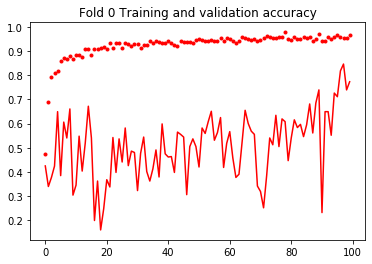

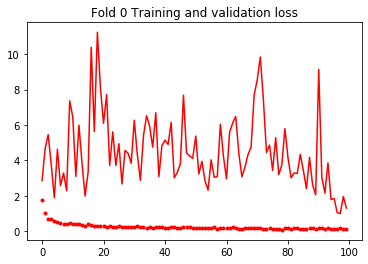

Found 2280 images belonging to 16 classes.
Found 565 images belonging to 16 classes.
Epoch 1/100
71/71 [==============================] - 65s 916ms/step - loss: 1.7486 - acc: 0.4705 - val_loss: 2.0957 - val_acc: 0.5643
Epoch 2/100
71/71 [==============================] - 59s 834ms/step - loss: 1.0202 - acc: 0.7078 - val_loss: 1.6189 - val_acc: 0.6567
Epoch 3/100
71/71 [==============================] - 59s 826ms/step - loss: 0.7466 - acc: 0.7711 - val_loss: 2.0544 - val_acc: 0.6135
Epoch 4/100
71/71 [==============================] - 59s 825ms/step - loss: 0.6480 - acc: 0.8041 - val_loss: 1.8744 - val_acc: 0.6435
Epoch 5/100
71/71 [==============================] - 58s 823ms/step - loss: 0.5977 - acc: 0.8253 - val_loss: 3.7521 - val_acc: 0.4428
Epoch 6/100
71/71 [==============================] - 58s 821ms/step - loss: 0.5639 - acc: 0.8354 - val_loss: 2.3269 - val_acc: 0.6285
Epoch 7/100
71/71 [==============================] - 58s 818ms/step - loss: 0.5281 - acc: 0.8394 - val_loss: 4.

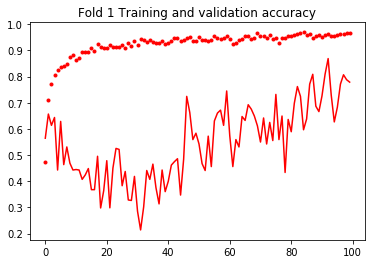

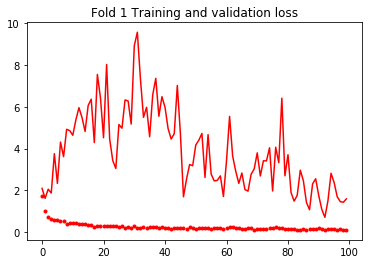

Found 2280 images belonging to 16 classes.
Found 565 images belonging to 16 classes.
Epoch 1/100
71/71 [==============================] - 66s 931ms/step - loss: 1.8517 - acc: 0.4411 - val_loss: 2.3842 - val_acc: 0.5055
Epoch 2/100
71/71 [==============================] - 59s 837ms/step - loss: 0.9761 - acc: 0.7064 - val_loss: 1.9469 - val_acc: 0.5929
Epoch 3/100
71/71 [==============================] - 59s 833ms/step - loss: 0.7856 - acc: 0.7720 - val_loss: 2.5936 - val_acc: 0.5722
Epoch 4/100
71/71 [==============================] - 59s 833ms/step - loss: 0.6895 - acc: 0.7997 - val_loss: 4.1170 - val_acc: 0.4184
Epoch 5/100
71/71 [==============================] - 59s 829ms/step - loss: 0.6308 - acc: 0.8200 - val_loss: 3.4074 - val_acc: 0.5235
Epoch 6/100
71/71 [==============================] - 59s 825ms/step - loss: 0.5560 - acc: 0.8442 - val_loss: 4.1215 - val_acc: 0.5028
Epoch 7/100
71/71 [==============================] - 58s 820ms/step - loss: 0.4900 - acc: 0.8508 - val_loss: 8.

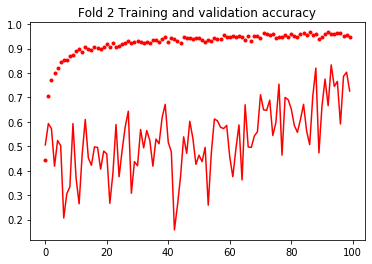

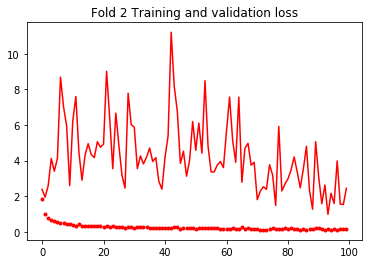

Found 2280 images belonging to 16 classes.
Found 565 images belonging to 16 classes.
Epoch 1/100
71/71 [==============================] - 66s 930ms/step - loss: 1.7981 - acc: 0.4666 - val_loss: 3.2274 - val_acc: 0.4173
Epoch 2/100
71/71 [==============================] - 60s 845ms/step - loss: 0.9344 - acc: 0.7249 - val_loss: 2.3984 - val_acc: 0.5591
Epoch 3/100
71/71 [==============================] - 60s 842ms/step - loss: 0.7730 - acc: 0.7724 - val_loss: 1.9138 - val_acc: 0.6360
Epoch 4/100
71/71 [==============================] - 59s 837ms/step - loss: 0.6459 - acc: 0.8094 - val_loss: 2.6236 - val_acc: 0.5516
Epoch 5/100
71/71 [==============================] - 59s 835ms/step - loss: 0.6435 - acc: 0.8090 - val_loss: 5.2061 - val_acc: 0.3565
Epoch 6/100
71/71 [==============================] - 59s 827ms/step - loss: 0.6253 - acc: 0.8174 - val_loss: 4.2230 - val_acc: 0.4522
Epoch 7/100
71/71 [==============================] - 58s 824ms/step - loss: 0.5637 - acc: 0.8368 - val_loss: 3.

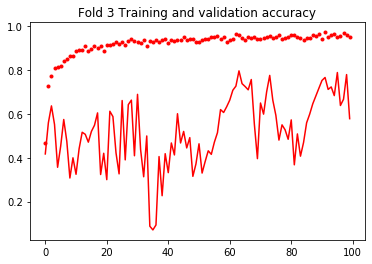

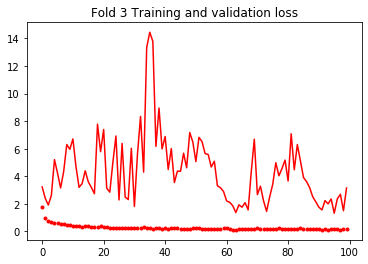

Found 2260 images belonging to 16 classes.
Found 585 images belonging to 16 classes.
Epoch 1/100
70/70 [==============================] - 66s 944ms/step - loss: 1.8813 - acc: 0.4390 - val_loss: 2.9312 - val_acc: 0.4861
Epoch 2/100
70/70 [==============================] - 59s 849ms/step - loss: 0.9824 - acc: 0.7134 - val_loss: 2.5752 - val_acc: 0.5045
Epoch 3/100
70/70 [==============================] - 59s 845ms/step - loss: 0.7485 - acc: 0.7855 - val_loss: 4.0696 - val_acc: 0.4539
Epoch 4/100
70/70 [==============================] - 59s 842ms/step - loss: 0.7383 - acc: 0.7876 - val_loss: 6.2892 - val_acc: 0.3490
Epoch 5/100
70/70 [==============================] - 59s 843ms/step - loss: 0.6144 - acc: 0.8156 - val_loss: 2.8322 - val_acc: 0.5298
Epoch 6/100
70/70 [==============================] - 58s 833ms/step - loss: 0.5248 - acc: 0.8395 - val_loss: 3.4983 - val_acc: 0.5425
Epoch 7/100
70/70 [==============================] - 59s 836ms/step - loss: 0.4990 - acc: 0.8537 - val_loss: 9.

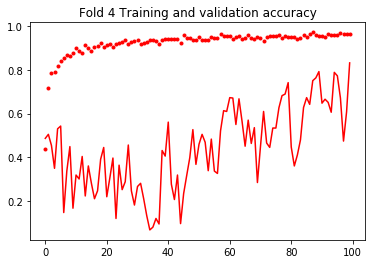

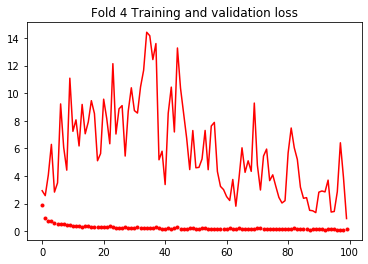

In [2]:
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.backend import clear_session
import matplotlib.pyplot as plt
from glob import glob

# Define constants
CLASSES = 16
WIDTH = 224
HEIGHT = 224
BATCH_SIZE = 32
EPOCHS = 10

# Create ImageDataGenerator to augment training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=0.5,
    height_shift_range=0.5,
    rotation_range=90,
    horizontal_flip=True,
    fill_mode='nearest')

# Create ImageDataGenerator to augment validation data
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=0.5,
    height_shift_range=0.5,
    rotation_range=90,
    horizontal_flip=True,
    fill_mode='nearest')

for fold in range(FOLDS):
  # Clear the keras session to speed up training and saving process
  clear_session()

  # Calculate steps per epoch and validation steps based on the size of the
  # datasets
  train = glob(str(fold)+'/'+TRAIN_DIR+'/*/*.jpg')
  validation = glob(str(fold)+'/'+VAL_DIR+'/*/*.jpg')
  STEPS_PER_EPOCH = len(train) // BATCH_SIZE
  VALIDATION_STEPS = len(validation) // BATCH_SIZE

  # Create the base MobileNetV2 model pre-trained with ImageNet weights but
  # excluding the top layers
  base_model = MobileNetV2(weights='imagenet', include_top=False)

  x = base_model.output
  # Add a pooling layer to increase accuracy of model and improve training speed
  # by reducing number of parameters
  x = GlobalAveragePooling2D(name='avg_pool')(x)
  # Add a 50% dropout layer to increase regularization
  x = Dropout(0.5)(x)
  # Add a dense layer with 16 classes to classify the image
  predictions = Dense(CLASSES, activation='softmax')(x)

  # Create the model using the input of the base model as input and using the
  # custom top layers as output
  model = Model(inputs=base_model.input, outputs=predictions)

  # Configure the model for training
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  # Create the training images from the images in the training directory
  train_generator = train_datagen.flow_from_directory(
      str(fold)+'/'+TRAIN_DIR,
      target_size=(WIDTH,HEIGHT),
      batch_size=BATCH_SIZE,
      class_mode='categorical')

  # Create the validation images from the images in the validation directory
  validation_generator = validation_datagen.flow_from_directory(
      str(fold)+'/'+VAL_DIR,
      target_size=(WIDTH,HEIGHT),
      batch_size=BATCH_SIZE,
      class_mode='categorical')

  # Train model using data generated from train_generator
  history = model.fit_generator(
      train_generator,
      epochs=EPOCHS,
      steps_per_epoch=STEPS_PER_EPOCH,
      validation_data=validation_generator,
      validation_steps=VALIDATION_STEPS)
  
  # Plot the accuracy and loss history of the model
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Fold '+str(fold)+' Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Fold '+str(fold)+' Training and validation loss')
  plt.show()

  # Save the weights of the model to a .h5 file named after the fold index
  model.save_weights(str(fold)+'.h5')
  model_json = model.to_json()
  # Save the representation of the model to a .json file named after the fold index
  with open(str(fold) + '.json', "w") as json_file:
      json_file.write(model_json)

#Required functions to test your method
_These are the five required methods that you must implement._

## prepareModel()
This function should prepare your model for multiple invocations of classifyImage(fname). For example, this function could be used to load a pre-trained model from a URL, where that model is then used by  classifyImage(fname). You should use global variables for any variables initialized by this function.

Runtime of this method is **limited to 5 minutes**, so please don’t retrain your network here. All training should be captured in a pre-trained model to be loaded by this method.


In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import model_from_json
from keras.backend import clear_session
import time

# Download models
!wget https://github.com/Thao-Tran/sysc4906/blob/master/Assignment%203/models.zip?raw=true
!unzip models.zip?raw=true

HEIGHT = 224
WIDTH = 224
FOLDS = 5

# List of building codes to use throughout notebook.
buildingCodes = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

def prepareModel():
  global models # Sample global variable that you may populate here.
  models = []
  print('Loading models...')
  for fold in range(FOLDS):
    # Load the representation of the model from the .json file
    json_file = open('models/'+str(fold) + '.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    # Load the weights of the model from the .h5 file
    model.load_weights('models/'+str(fold)+'.h5')
    models.append(model)
  print('Done loading models!')

--2019-12-03 13:01:01--  https://github.com/Thao-Tran/sysc4906/blob/master/Assignment%203/models.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Thao-Tran/sysc4906/raw/master/Assignment%203/models.zip [following]
--2019-12-03 13:01:02--  https://github.com/Thao-Tran/sysc4906/raw/master/Assignment%203/models.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Thao-Tran/sysc4906/master/Assignment%203/models.zip [following]
--2019-12-03 13:01:02--  https://raw.githubusercontent.com/Thao-Tran/sysc4906/master/Assignment%203/models.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443..

## label = classifyImage(fname)
Accepts a filename (e.g. ‘test/ME/testImage1.jpg’) of a square JPG image with size at least 500x500 pixels.
Returns a 2-character label corresponding to the predicted building (see table of labels above)

Any variables initialized by prepareModel() should be declared as global within this function if you want to access them (e.g. a pre-trained model)


In [0]:
from keras.preprocessing import image as kp_image
from keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

def classifyImage(fname):
  global models # Sample global variable that you may populate in prepareModel and use here.

  img = kp_image.load_img(fname, target_size=(HEIGHT, WIDTH))
  x = kp_image.img_to_array(img)  # Convert image to nparray
  x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
  x = preprocess_input(x)         # Normalize image to match how Inceptionv3 expects to receive images
  print("Predicting class of '{0:s}' using ensemble model".format(fname))
  preds = np.zeros(len(buildingCodes))
  # Add the prediction scores of each model
  for fold in range(FOLDS):
    preds += models[fold].predict(x)[0]        # Use the model to compute prediction score for each possible class
  # Divide the scores by the number of folds to get the average
  preds /= FOLDS
  pred = ''
  score = -1
  # Return the highest scored prediction
  for i in range(len(preds)):
    if preds[i] > score:
      pred = buildingCodes[i]
      score = preds[i]
  return pred

## Metrics
This code block is to calcaulate the metrics of the ensemble model. It returns the confusion matrix and accuracy of the model based on the predictions on the hold out test set.

In [19]:
from glob import glob
from sklearn.metrics import confusion_matrix, accuracy_score
import time

TEST_DIR = 'test'

def get_metrics():
  # Load the models
  prepareModel()
  y_true = []
  y_pred = []
  for building in buildingCodes:
    paths = glob(TEST_DIR+'/'+building+'/*.jpg')
    y_true += [building] * len(paths)
    # Classify each image of the current building in the test set
    y_pred += [classifyImage(path) for path in paths]
  return confusion_matrix(y_true, y_pred), accuracy_score(y_true, y_pred)

cm, accuracy = get_metrics()
print(cm)

Loading models...
Done loading models!
Predicting class of 'test/AA/373-5.jpg' using ensemble model
Predicting class of 'test/AA/903-3.jpg' using ensemble model
Predicting class of 'test/AA/120-6.jpg' using ensemble model
Predicting class of 'test/AA/959-5.jpg' using ensemble model
Predicting class of 'test/AA/030_2.jpg' using ensemble model
Predicting class of 'test/AA/576_2.jpg' using ensemble model
Predicting class of 'test/AA/309-3.jpg' using ensemble model
Predicting class of 'test/AA/120-2.jpg' using ensemble model
Predicting class of 'test/AA/309-2.jpg' using ensemble model
Predicting class of 'test/AA/309-5.jpg' using ensemble model
Predicting class of 'test/AA/120-4.jpg' using ensemble model
Predicting class of 'test/AA/285_4.jpg' using ensemble model
Predicting class of 'test/AA/250_4.jpg' using ensemble model
Predicting class of 'test/AA/713_5.jpg' using ensemble model
Predicting class of 'test/AA/606_2.jpg' using ensemble model
Predicting class of 'test/AA/713_3.jpg' using 

## label = worstRecall()
Returns the label of a building that you expect will have to lowest recall, when tested on new images

In [20]:
from glob import glob

def worstRecall():
  worst_recall = -1
  building = ''
  for i in range(len(buildingCodes)):
    tp = cm[i][i]
    fn = sum(cm[i])
    recall = tp / (tp+fn)
    if worst_recall == -1 or recall < worst_recall:
      worst_recall = recall
      building = buildingCodes[i]
  return building
print(worstRecall())

DT


## label = bestPrecision()
Returns the label of a building that you expect will have to highest precision, when tested on new images

In [21]:
def bestPrecision():
  best_precision = -1
  building = ''
  for i in range(len(buildingCodes)):
    tp = cm[i][i]
    fp = sum(cm[:][i])
    precision = tp / (tp+fp)
    if precision > best_precision:
      best_precision = precision
      building = buildingCodes[i]
  return building
print(bestPrecision())

HP


##acc_score = estimatedAccuracy()
Returns the accuracy (between [0.0,1.0]) that you expect to achieve across all test images, assuming that each building is equally represented


In [22]:
# Function to return estimated accuracy that will be obtained across all test images
def estimatedAccuracy():
  return accuracy

print(estimatedAccuracy())

0.9099804305283757


# Test required functions
_We will replace the text below with our actual test code..._

Loading models...
Done loading models!
--2019-12-03 13:06:45--  https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment3/Images/SampleImages.zip [following]
--2019-12-03 13:06:45--  https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment3/Images/SampleImages.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment3/Images/SampleImages.zip [following]
--2019-12-03 13:06:46--  https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment3/Images/SampleImages.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)

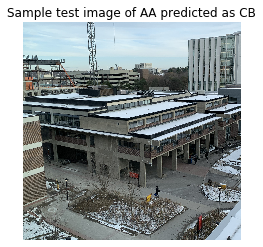

Incorrect...
Predicting class of 'SampleImages/CB_1.jpg' using ensemble model


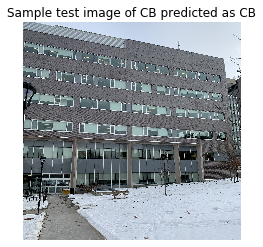

Correct!
Predicting class of 'SampleImages/DT_1.jpg' using ensemble model


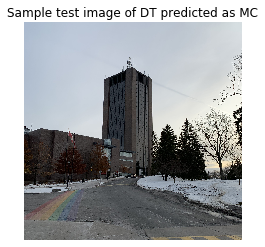

Incorrect...
Predicting class of 'SampleImages/HS_1.jpg' using ensemble model


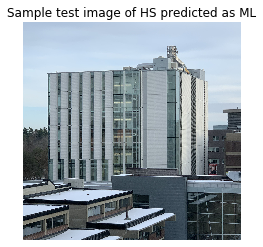

Incorrect...
Expected that worst recall would be on DT
Expected that best precision would be on HP
Expected total accuracy would be 0.910
Actual total accuracy is 0.250


In [23]:
import numpy as np
from PIL import Image, ExifTags
import matplotlib.pyplot as plt
from glob import glob


# First prepare the model:
prepareModel() # Limited to 5 minutes...

# Load (secret) test data into local Colab environment
!wget https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
!unzip SampleImages.zip?raw=true #Should create 4 images
test_images = sorted(glob('SampleImages/*.jpg'))
actual_labels = (buildingCodes[0],buildingCodes[1],buildingCodes[3],buildingCodes[6])

# Classify sample test images:
TP = 0
for imgFname,actual_label in (zip(test_images,actual_labels)):
  pred_label = classifyImage(imgFname) # Predict the label of this image file

  # Plot the image with actual and predicted labels
  # Note that we may have to rotate the image, depending on the 
  # orientation of the camera. Use EXIF tags for this:
  im = Image.open(imgFname)
  for orientation in ExifTags.TAGS.keys() : 
    if ExifTags.TAGS[orientation]=='Orientation' : break 
  exif=dict(im._getexif().items())

  if exif[orientation] == 3 : 
    im=im.rotate(180, expand=True)
  elif exif[orientation] == 6 : 
    im=im.rotate(270, expand=True)
  elif exif[orientation] == 8 : 
    im=im.rotate(90, expand=True)

  im = im.convert('RGB') # May not be necessary?

  plt.title("Sample test image of {0:s} predicted as {1:s}".format(actual_label, pred_label))
  plt.imshow(np.asarray(im))
  plt.axis('off')
  plt.show()

  if (pred_label==actual_label):
    print('Correct!')
    TP += 1
  else:
    print("Incorrect...")

# Print the predicted performance:
print("Expected that worst recall would be on {0:s}".format(worstRecall()))
print("Expected that best precision would be on {0:s}".format(bestPrecision()))
print("Expected total accuracy would be {0:.3f}".format(estimatedAccuracy()))
print("Actual total accuracy is {0:.3f}".format((TP)/(len(test_images))))
